In [155]:
# biz multistep'i joint olarak tahmin ediyoruz, her stepi independent tahmin eden bir şey de deneyebilirdik
# joint vs independent multistep forecasting

In [72]:
# cross entropy ile train etmek
# sigmoid dene,

# (94,24)lük bi output üretmeye çalışıyoruz, bunun yerine channel'ı tutmayıp dense flattened bir şeyer üretsek (94*24)lük 

#### Summary

- 672 nolu plant seçildi
- 120 saatlik featurelar verildi
- speed ve angle feature'ı yaratıldı 
- son 24 saat tahmin edilmeye çalışıldı

- **Linear**
    - dense - dropout - dense **Linear2**  
        - test wmape **0.3449** valid wmape **0.3324**
    - dense - dropout - dense - dropout - dense
        - test wmape **0.3504** valid wmape **0.3343**
    - dense - dense
        - test wmape **0.3622** valid wmape **0.3279**
- **Convolution**
    - Conv(64, 5) - MaxPooling(2) - Conv(64, 5) - MaxPooling(2) - dense - dense **CNN4**
        - test wmape **0.2697** valid wmape **0.3221** - testte en iyi
    - Conv(64, 3) - MaxPooling(2) - Conv(64, 3) - MaxPooling(2) - dense - dense
        - test wmape **0.2797** valid wmape **0.3230** - testte en iyi ikinci
    - Conv(64, 5) - MaxPooling(2) - Conv(64, 5) - MaxPooling(2) - Conv(64, 5) - Dropout(0.2) - dense - dense **CNN8**
        - test wmape **0.2839** valid wmape **0.3307** - testte en iyi üçüncü
    - Conv(64, 5) - MaxPooling(2) - Conv(64, 5) - Dropout(0.2) - dense - dense
        - test wmape **0.3080** valid wmape **0.3113** - validasyonda overall en iyi     
    - Conv(64, 5) - Dropout(0.2) - Conv(64, 5) - Dropout(0.2) - dense - dense
        - test wmape **0.2993** valid wmape **0.3161** - validasyonda en iyi ikinci
    - Conv(64, 24) - Conv(64, 24) - dense - dense
        - test wmape **0.3020** valid wmape **0.3211** - validasyonda en iyi üçüncü

- **Recurrent**
    - Conv(64, 5) - MaxPooling(2) - Conv(32, 5) - MaxPooling(2) - LSTM(32) - dense **RNN5**
        - test wmape **0.2640** valid wmape **0.3225** - testte overall en iyi 
    - LSTM(64) - LSTM(32) - dense
        - test wmape **0.2656** valid wmape **0.3240**
    - Conv(64, 5) - MaxPooling(2) - LSTM(32) - dense **RNN4**
        - test wmape **0.2670** valid wmape **0.3235** 
    
    
 Others:
 - 72 window size'de LSTM CNN'den kötü çalıştı
 - 144 window size, 969, no speed & angle
|         |   test_WMAPE |   valid_WMAPE |
|:--------|-------------:|--------------:|
| CNN4    |     0.269104 |      0.195882 |
| RNN4    |     0.286094 |      0.222127 |
| RNN2    |     0.301866 |      0.225191 |
| CNN8    |     0.306718 |      0.186613 |
| Linear2 |     0.591632 |      0.270318 |

- 144 window size, 969, with speed & angle
|         |   test_WMAPE |   valid_WMAPE |
|:--------|-------------:|--------------:|
| RNN5    |     0.268528 |      0.221569 |
| RNN4    |     0.272068 |      0.223544 |
| CNN8    |     0.281256 |      0.211298 |
| RNN2    |     0.290445 |      0.215808 |
| CNN4    |     0.297803 |      0.197183 |
| Linear2 |     0.35967  |      0.23287  |

- 144 window size, 969, no speed & angle, with 48 hour lagged y
|         |   test_WMAPE |   valid_WMAPE |
|:--------|-------------:|--------------:|
| RNN4    |     0.301939 |      0.208679 |
| RNN5    |     0.313499 |      0.209053 |
| CNN4    |     0.321136 |      0.194933 |
| CNN8    |     0.322948 |      0.196475 |
| Linear2 |     0.521663 |      0.279276 |

- 144 window size, 969, with speed & angle, with 48 hour lagged y
|         |   test_WMAPE |   valid_WMAPE |
|:--------|-------------:|--------------:|
| RNN4    |     0.27648  |      0.209708 |
| RNN5    |     0.2771   |      0.221818 |
| CNN8    |     0.288945 |      0.200607 |
| CNN4    |     0.297947 |      0.194816 |
| Linear2 |     0.355495 |      0.2217   |
 
 
|         |   test_WMAPE |   valid_WMAPE |
|:--------|-------------:|--------------:|
| RNN4    |     0.275004 |      0.218043 |
| CNN9    |     0.282984 |      0.198089 |
| RNN5    |     0.284812 |      0.224892 |
| CNN8    |     0.286998 |      0.215724 |
| CNN7    |     0.288347 |      0.202105 |
| CNN5    |     0.291741 |      0.202178 |
| CNN4    |     0.291896 |      0.193898 |
| CNN6    |     0.294105 |      0.199657 |
| CNN1    |     0.297852 |      0.207869 |
| CNN2    |     0.300469 |      0.198918 |
| CNN3    |     0.305155 |      0.216291 |
| RNN2    |     0.312107 |      0.211223 |
| RNN1    |     0.313431 |      0.208321 |
| RNN3    |     0.316233 |      0.210959 |
| Linear2 |     0.355035 |      0.224861 |
| Linear3 |     0.362393 |      0.226505 |
| Linear1 |     0.368817 |      0.21642  |


- 144 window size, 969, with speed & angle, with 48 hour lagged y, train ratio 0.6, valid 0.06 (approx. 1 year of test period)
|         |   test_WMAPE |   valid_WMAPE |
|:--------|-------------:|--------------:|
| RNN5    |     0.308653 |      0.350136 |
| CNN8    |     0.31365  |      0.319489 |
| RNN1    |     0.315903 |      0.345974 |
| RNN4    |     0.317685 |      0.35182  |
| CNN4    |     0.319224 |      0.308687 |
| Linear2 |     0.365302 |      0.398116 |


- 144 window size, 969, with speed & angle, with 48 hour lagged y

|         |   test_WMAPE |   valid_WMAPE |
|:--------|-------------:|--------------:|
| MAE     |     0.358325 |      0.21528  |
| Huber   |     0.36017  |      0.221245 |
| LogCosh |     0.361389 |      0.221966 |
| MSE     |     0.362175 |      0.217444 |
| MSLE    |     0.366114 |      0.23139  |
| MAPE    |     0.83053  |      0.805053 |
| CS      |     5.31436  |      4.52681  |

 

In [159]:
GENERATE_SPEED_ANGLE = True
add_lagged = True
INPUT_WIDTH = 144

train_ratio = 0.8
valid_ratio = 0.1

In [1]:
import os; os.getcwd()

'/home/mert/Desktop/thesis/notebooks'

In [2]:
from ..scripts import window

ImportError: attempted relative import with no known parent package

In [160]:
import warnings; warnings.filterwarnings("ignore")

In [161]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models, layers

In [162]:
df = pd.read_parquet("../data/processed/outlier_removed.parquet")

In [163]:
if add_lagged:
    df["production_48_lagged"] = df.groupby("rt_plant_id").production.shift(48)

# SELECTED_PLANT = 0
# PLANTS = sorted(df.rt_plant_id.unique())
# SELECTED_PLANT_ID = PLANTS[SELECTED_PLANT]

SELECTED_PLANT_ID = df.groupby("rt_plant_id").production.sum().sort_values(ascending=False).index[0]
print(SELECTED_PLANT_ID)
weather_cols = [col for col in df.columns if col.startswith(("UGRD", "VGRD"))]
if add_lagged:
    df = df.set_index("forecast_dt")[["rt_plant_id", "production", "production_48_lagged", *weather_cols]]
    df = df.dropna()
else:    
    df = df.set_index("forecast_dt")[["rt_plant_id", "production", *weather_cols]]
df = df[df["rt_plant_id"] == SELECTED_PLANT_ID].drop("rt_plant_id", axis=1)

969


In [164]:
if GENERATE_SPEED_ANGLE:
    for box in ["SW", "NW", "NE", "SE"]:
        df[f"speed_{box}"] = np.sqrt(np.square(df[f"UGRD_80.m.above.ground.{box}"]) + np.square(df[f"VGRD_80.m.above.ground.{box}"]))
        df[f"angle_{box}"] = np.arctan(df[f"UGRD_80.m.above.ground.{box}"] / df[f"VGRD_80.m.above.ground.{box}"])
        
time_indices = sorted(df.index.unique())

train_indices = time_indices[:int(len(time_indices) * train_ratio)]
valid_indices = time_indices[int(len(time_indices) * train_ratio):int(len(time_indices) * (train_ratio + valid_ratio))]
test_indices = time_indices[int(len(time_indices) * (train_ratio + valid_ratio)):]

train_df = df.loc[train_indices, :]
valid_df = df.loc[valid_indices, :]
test_df = df.loc[test_indices, :]

print("Train start and end dates: ", train_indices[0], train_indices[-1])
try:
    print("Validation start and end dates: ", valid_indices[0], valid_indices[-1])
except:
    pass
print("Test start and end dates: ", test_indices[0], test_indices[-1])

Train start and end dates:  2019-01-26 03:00:00 2021-06-22 09:00:00
Validation start and end dates:  2021-06-22 10:00:00 2021-10-10 04:00:00
Test start and end dates:  2021-10-10 05:00:00 2022-01-27 23:00:00


In [165]:
if 0:
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.plot(train_df.index, train_df.production)
    plt.subplot(3, 1, 2)
    plt.plot(valid_df.index, valid_df.production)
    plt.subplot(3, 1, 3)
    plt.plot(test_df.index, test_df.production)
    plt.show()


In [166]:
scaler = MinMaxScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df), index=train_df.index, columns=train_df.columns)
try:
    valid_df = pd.DataFrame(scaler.transform(valid_df), index=valid_df.index, columns=valid_df.columns)
except:
    pass
test_df = pd.DataFrame(scaler.transform(test_df), index=test_df.index, columns=test_df.columns)

In [167]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, valid_df=valid_df, test_df=test_df,
                 columns=None, label_columns=None):
        self.train_df = train_df
        self.valid_df = valid_df
        self.test_df = test_df
        if columns is None:
            columns = train_df.columns

        self.label_columns = label_columns
        self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(columns)}
        self.feature_column_indices = [v for k,v in self.column_indices.items() if k not in self.label_columns]
        self.feature_number = len(self.feature_column_indices)
        # list(self.label_columns_indices.values())

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

    def split_window(self, features):
        inputs = features[:, self.input_slice, 1:]
        labels = features[:, self.labels_slice, :1]
        labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        return inputs, labels

    def plot(self, model=None, plot_col='production', plant=None, max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            label_col_index = self.label_columns_indices.get(plot_col, None)  
            input_values = inputs[n, :, plot_col_index]
            label_values = labels[n, :, label_col_index]
            plt.plot(self.input_indices, input_values, label='Inputs', marker='.', zorder=-10)
            plt.scatter(self.label_indices, label_values, edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                prediction_values = predictions[n, :, label_col_index]
                prediction_values = tf.clip_by_value(prediction_values, clip_value_min=0, clip_value_max=1)
                plt.scatter(self.label_indices, prediction_values, marker='X', edgecolors='k', label='Predictions', c='#ff7f0e', s=64)
            if n == 0:
                plt.legend()
        plt.xlabel('Time [h]')

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data, targets=None,
            sequence_length=self.total_window_size,
            # sequence_stride=24, shuffle=False,
            sequence_stride=1, shuffle=True,
            batch_size=64,)
        ds = ds.map(self.split_window)
        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def valid(self):
        return self.make_dataset(self.valid_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            result = next(iter(self.train))
            self._example = result
        return result

In [152]:
def wmape(y_true, y_pred):
    total_abs_diff = tf.reduce_sum(tf.abs(tf.subtract(y_true, y_pred)))
    total = tf.reduce_sum(y_true)
    wmape = tf.realdiv(total_abs_diff, total)
    return wmape

MAX_EPOCHS = 100

def compile_and_fit(model, window, loss=tf.losses.MeanSquaredError(), patience=10):
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_wmape',
        patience=patience,
        mode='min', 
        verbose=0,
        restore_best_weights=True)
    
    optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')
    model.compile(loss=loss,
                  optimizer=tf.optimizers.Adam(),
                  metrics=[wmape]) # tf.metrics.MeanAbsoluteError(), wmape]) 
    
    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        validation_data=window.valid,
                        verbose=1,
                        callbacks=[early_stopping],
                       #  validation_steps=50
                       )
    return history

In [116]:
OUT_STEPS = 24

multi_window = WindowGenerator(
    train_df=train_df, valid_df=valid_df, test_df=test_df,
    input_width=INPUT_WIDTH, label_width=24, shift=0, label_columns=["production"])
# multi_window

In [117]:
# multi_window.plot()

In [133]:
multi_val_performance = {}
multi_performance = {}

## Dense

### Linear1

In [13]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Flatten())
model.add(layers.Dense(OUT_STEPS))
model.add(layers.Reshape([OUT_STEPS, 1]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 144, 24)           432       
                                                                 
 flatten (Flatten)           (None, 3456)              0         
                                                                 
 dense_1 (Dense)             (None, 24)                82968     
                                                                 
 reshape (Reshape)           (None, 24, 1)             0         
                                                                 
Total params: 83,400
Trainable params: 83,400
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = compile_and_fit(model, multi_window)

Epoch 1/100
328/328 [==============================] - 1s 3ms/step - loss: 0.0367 - mean_absolute_error: 0.1412 - wmape: 0.4501 - val_loss: 0.0175 - val_mean_absolute_error: 0.1056 - val_wmape: 0.2376
Epoch 2/100
328/328 [==============================] - 1s 2ms/step - loss: 0.0227 - mean_absolute_error: 0.1118 - wmape: 0.3570 - val_loss: 0.0191 - val_mean_absolute_error: 0.1117 - val_wmape: 0.2509
Epoch 3/100
328/328 [==============================] - 1s 2ms/step - loss: 0.0219 - mean_absolute_error: 0.1097 - wmape: 0.3504 - val_loss: 0.0193 - val_mean_absolute_error: 0.1090 - val_wmape: 0.2443
Epoch 4/100
328/328 [==============================] - 1s 2ms/step - loss: 0.0212 - mean_absolute_error: 0.1079 - wmape: 0.3442 - val_loss: 0.0163 - val_mean_absolute_error: 0.1009 - val_wmape: 0.2266
Epoch 5/100
328/328 [==============================] - 1s 2ms/step - loss: 0.0207 - mean_absolute_error: 0.1069 - wmape: 0.3418 - val_loss: 0.0162 - val_mean_absolute_error: 0.1012 - val_wmape: 0.

In [15]:
multi_val_performance['Linear1'] = model.evaluate(multi_window.valid)
multi_performance['Linear1'] = model.evaluate(multi_window.test)

39/39 [==============================] - 0s 2ms/step - loss: 0.0356 - mean_absolute_error: 0.1423 - wmape: 0.3688


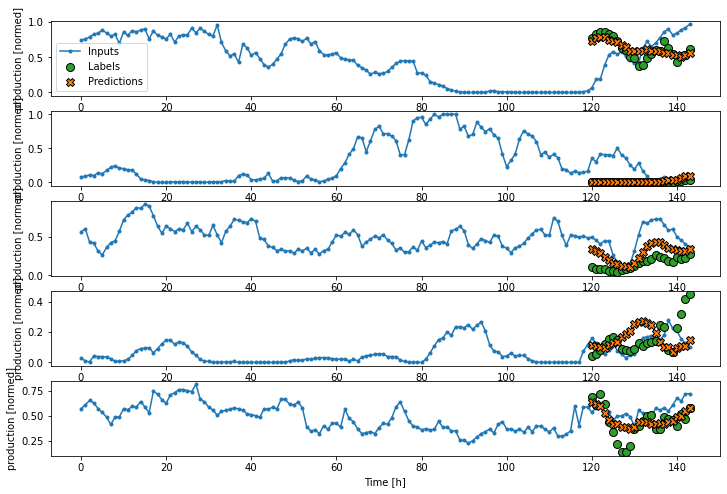

In [16]:
multi_window.plot(model, max_subplots=5)

### Linear2

In [134]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(OUT_STEPS))
model.add(layers.Reshape([OUT_STEPS, 1]))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 144, 24)           432       
                                                                 
 dropout_5 (Dropout)         (None, 144, 24)           0         
                                                                 
 flatten_6 (Flatten)         (None, 3456)              0         
                                                                 
 dense_16 (Dense)            (None, 24)                82968     
                                                                 
 reshape_9 (Reshape)         (None, 24, 1)             0         
                                                                 
Total params: 83,400
Trainable params: 83,400
Non-trainable params: 0
_________________________________________________________________


In [138]:
history = compile_and_fit(model, multi_window, loss=tf.keras.losses.MeanSquaredError())
multi_val_performance['MSE'] = model.evaluate(multi_window.valid)
multi_performance['MSE'] = model.evaluate(multi_window.test)

39/39 [==============================] - 0s 1ms/step - loss: 0.0329 - wmape: 0.3622


In [139]:
history = compile_and_fit(model, multi_window, loss=tf.keras.losses.MeanAbsoluteError())
multi_val_performance['MAE'] = model.evaluate(multi_window.valid)
multi_performance['MAE'] = model.evaluate(multi_window.test)

39/39 [==============================] - 0s 1ms/step - loss: 0.1382 - wmape: 0.3583


In [140]:
history = compile_and_fit(model, multi_window, loss=tf.keras.losses.MeanAbsolutePercentageError())
multi_val_performance['MAPE'] = model.evaluate(multi_window.valid)
multi_performance['MAPE'] = model.evaluate(multi_window.test)

39/39 [==============================] - 0s 1ms/step - loss: 1397444.0000 - wmape: 0.8305


In [141]:
history = compile_and_fit(model, multi_window, loss=tf.keras.losses.MeanSquaredLogarithmicError())
multi_val_performance['MSLE'] = model.evaluate(multi_window.valid)
multi_performance['MSLE'] = model.evaluate(multi_window.test)


39/39 [==============================] - 0s 1ms/step - loss: 0.0147 - wmape: 0.3661


In [142]:
history = compile_and_fit(model, multi_window, loss=tf.keras.losses.CosineSimilarity())
multi_val_performance['CS'] = model.evaluate(multi_window.valid)
multi_performance['CS'] = model.evaluate(multi_window.test)

39/39 [==============================] - 0s 1ms/step - loss: -0.9478 - wmape: 5.3144


In [143]:
history = compile_and_fit(model, multi_window, loss=tf.keras.losses.Huber())
multi_val_performance['Huber'] = model.evaluate(multi_window.valid)
multi_performance['Huber'] = model.evaluate(multi_window.test)

39/39 [==============================] - 0s 1ms/step - loss: 0.0165 - wmape: 0.3602


In [144]:
history = compile_and_fit(model, multi_window, loss=tf.keras.losses.LogCosh())
multi_val_performance['LogCosh'] = model.evaluate(multi_window.valid)
multi_performance['LogCosh'] = model.evaluate(multi_window.test)

39/39 [==============================] - 0s 1ms/step - loss: 0.0164 - wmape: 0.3614


In [153]:
history = compile_and_fit(model, multi_window, loss= tf.nn.sigmoid_cross_entropy_with_logits)


Epoch 1/100
328/328 [==============================] - 1s 3ms/step - loss: 0.4477 - wmape: 5.3697 - val_loss: 0.5068 - val_wmape: 2.9617
Epoch 2/100
328/328 [==============================] - 1s 3ms/step - loss: 0.4469 - wmape: 5.3885 - val_loss: 0.5032 - val_wmape: 2.9389
Epoch 3/100
328/328 [==============================] - 1s 3ms/step - loss: 0.4468 - wmape: 5.3787 - val_loss: 0.5052 - val_wmape: 2.9043
Epoch 4/100
328/328 [==============================] - 1s 3ms/step - loss: 0.4467 - wmape: 5.3847 - val_loss: 0.5070 - val_wmape: 3.0395
Epoch 5/100
328/328 [==============================] - 1s 3ms/step - loss: 0.4463 - wmape: 5.4035 - val_loss: 0.5020 - val_wmape: 2.6833
Epoch 6/100
328/328 [==============================] - 1s 3ms/step - loss: 0.4468 - wmape: 5.4801 - val_loss: 0.5046 - val_wmape: 2.9664
Epoch 7/100
328/328 [==============================] - 1s 3ms/step - loss: 0.4463 - wmape: 5.4241 - val_loss: 0.5024 - val_wmape: 2.7660
Epoch 8/100
328/328 [====================

In [103]:
multi_val_performance['Linear2'] = model.evaluate(multi_window.valid)
multi_performance['Linear2'] = model.evaluate(multi_window.test)

39/39 [==============================] - 0s 1ms/step - loss: 0.0344 - wmape: 0.3657


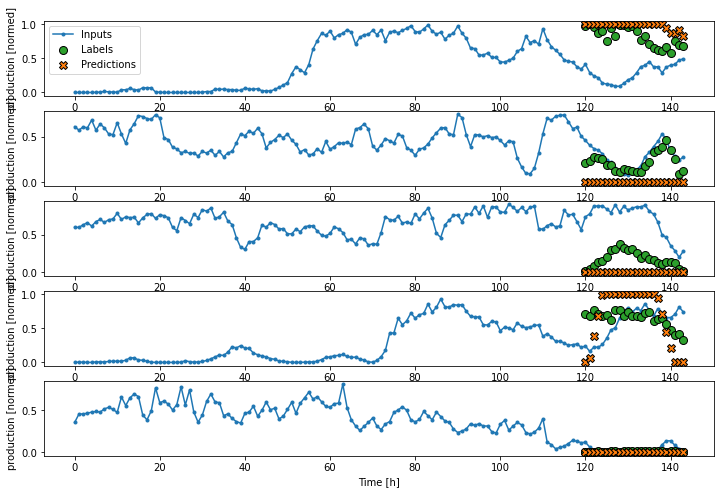

In [154]:
multi_window.plot(model, max_subplots=5)

### Linear3

In [21]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(OUT_STEPS))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(OUT_STEPS))
model.add(layers.Reshape([OUT_STEPS, 1]))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 144, 24)           432       
                                                                 
 dropout_1 (Dropout)         (None, 144, 24)           0         
                                                                 
 dense_5 (Dense)             (None, 144, 24)           600       
                                                                 
 dropout_2 (Dropout)         (None, 144, 24)           0         
                                                                 
 flatten_2 (Flatten)         (None, 3456)              0         
                                                                 
 dense_6 (Dense)             (None, 24)                82968     
                                                                 
 reshape_2 (Reshape)         (None, 24, 1)            

In [22]:
history = compile_and_fit(model, multi_window)

Epoch 1/100
328/328 [==============================] - 2s 5ms/step - loss: 0.0368 - mean_absolute_error: 0.1414 - wmape: 0.4501 - val_loss: 0.0180 - val_mean_absolute_error: 0.1078 - val_wmape: 0.2418
Epoch 2/100
328/328 [==============================] - 2s 5ms/step - loss: 0.0231 - mean_absolute_error: 0.1132 - wmape: 0.3621 - val_loss: 0.0218 - val_mean_absolute_error: 0.1153 - val_wmape: 0.2586
Epoch 3/100
328/328 [==============================] - 2s 5ms/step - loss: 0.0222 - mean_absolute_error: 0.1114 - wmape: 0.3566 - val_loss: 0.0184 - val_mean_absolute_error: 0.1062 - val_wmape: 0.2383
Epoch 4/100
328/328 [==============================] - 2s 5ms/step - loss: 0.0215 - mean_absolute_error: 0.1096 - wmape: 0.3498 - val_loss: 0.0177 - val_mean_absolute_error: 0.1045 - val_wmape: 0.2344
Epoch 5/100
328/328 [==============================] - 2s 5ms/step - loss: 0.0211 - mean_absolute_error: 0.1089 - wmape: 0.3480 - val_loss: 0.0190 - val_mean_absolute_error: 0.1080 - val_wmape: 0.

In [23]:
multi_val_performance['Linear3'] = model.evaluate(multi_window.valid)
multi_performance['Linear3'] = model.evaluate(multi_window.test)

39/39 [==============================] - 0s 2ms/step - loss: 0.0333 - mean_absolute_error: 0.1391 - wmape: 0.3624


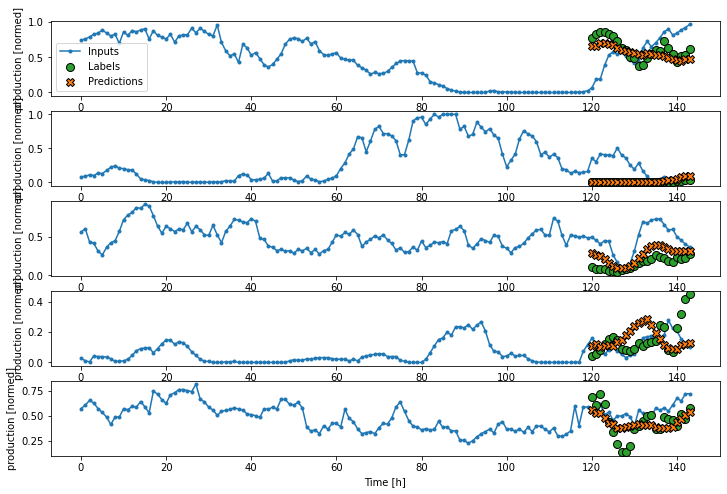

In [24]:
multi_window.plot(model, max_subplots=5)

## Convolution

### Conv1

In [25]:
CONV_WIDTH = 5

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.Conv1D(256, CONV_WIDTH, activation="relu"))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Flatten())
model.add(layers.Dense(OUT_STEPS))
model.add(layers.Reshape([OUT_STEPS, 1]))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 140, 256)          22016     
                                                                 
 dense_7 (Dense)             (None, 140, 24)           6168      
                                                                 
 flatten_3 (Flatten)         (None, 3360)              0         
                                                                 
 dense_8 (Dense)             (None, 24)                80664     
                                                                 
 reshape_3 (Reshape)         (None, 24, 1)             0         
                                                                 
Total params: 108,848
Trainable params: 108,848
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = compile_and_fit(model, multi_window)

Epoch 1/100
328/328 [==============================] - 4s 11ms/step - loss: 0.0306 - mean_absolute_error: 0.1269 - wmape: 0.4050 - val_loss: 0.0174 - val_mean_absolute_error: 0.1048 - val_wmape: 0.2355
Epoch 2/100
328/328 [==============================] - 4s 11ms/step - loss: 0.0172 - mean_absolute_error: 0.0972 - wmape: 0.3107 - val_loss: 0.0184 - val_mean_absolute_error: 0.1054 - val_wmape: 0.2365
Epoch 3/100
328/328 [==============================] - 4s 11ms/step - loss: 0.0156 - mean_absolute_error: 0.0925 - wmape: 0.2955 - val_loss: 0.0159 - val_mean_absolute_error: 0.0993 - val_wmape: 0.2233
Epoch 4/100
328/328 [==============================] - 4s 11ms/step - loss: 0.0143 - mean_absolute_error: 0.0890 - wmape: 0.2843 - val_loss: 0.0157 - val_mean_absolute_error: 0.0980 - val_wmape: 0.2195
Epoch 5/100
328/328 [==============================] - 4s 11ms/step - loss: 0.0135 - mean_absolute_error: 0.0864 - wmape: 0.2760 - val_loss: 0.0157 - val_mean_absolute_error: 0.0972 - val_wmap

In [27]:
multi_val_performance['CNN1'] = model.evaluate(multi_window.valid)
multi_performance['CNN1'] = model.evaluate(multi_window.test)

39/39 [==============================] - 0s 4ms/step - loss: 0.0228 - mean_absolute_error: 0.1148 - wmape: 0.2979


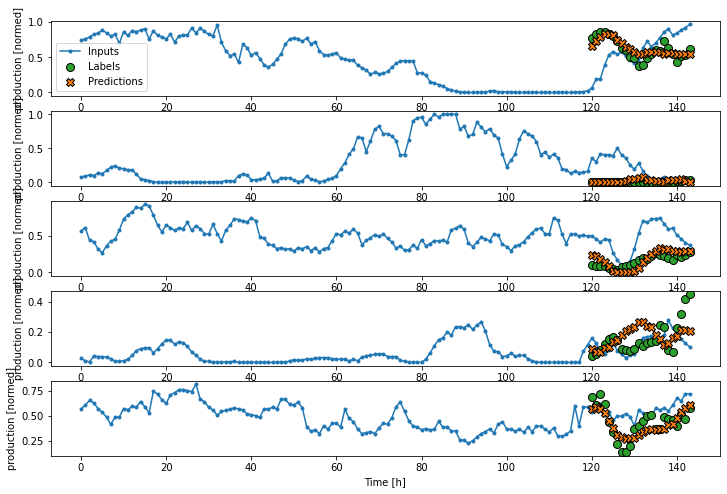

In [28]:
multi_window.plot(model, max_subplots=5)

In [29]:
pd.DataFrame(multi_val_performance, index=["loss", "MAE", "WMAPE"])

,Linear1,Linear2,Linear3,CNN1
loss,0.015127,0.016251,0.016377,0.013912
MAE,0.096474,0.100133,0.100834,0.092510
WMAPE,0.216420,0.224861,0.226505,0.207869


In [30]:
pd.DataFrame(multi_performance, index=["loss", "MAE", "WMAPE"])

,Linear1,Linear2,Linear3,CNN1
loss,0.035612,0.032526,0.033287,0.022836
MAE,0.142289,0.136900,0.139133,0.114811
WMAPE,0.368817,0.355035,0.362393,0.297852


### Conv2

- CONV WIDTH 5 24ten daha iyi çalıştı

In [31]:
CONV_WIDTH = 24

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.Conv1D(256, CONV_WIDTH, activation="relu"))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Flatten())
model.add(layers.Dense(OUT_STEPS))
model.add(layers.Reshape([OUT_STEPS, 1]))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 121, 256)          104704    
                                                                 
 dense_9 (Dense)             (None, 121, 24)           6168      
                                                                 
 flatten_4 (Flatten)         (None, 2904)              0         
                                                                 
 dense_10 (Dense)            (None, 24)                69720     
                                                                 
 reshape_4 (Reshape)         (None, 24, 1)             0         
                                                                 
Total params: 180,592
Trainable params: 180,592
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = compile_and_fit(model, multi_window)

Epoch 1/100
328/328 [==============================] - 6s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.1438 - wmape: 0.4586 - val_loss: 0.0208 - val_mean_absolute_error: 0.1123 - val_wmape: 0.2518
Epoch 2/100
328/328 [==============================] - 6s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.1059 - wmape: 0.3378 - val_loss: 0.0156 - val_mean_absolute_error: 0.0961 - val_wmape: 0.2160
Epoch 3/100
328/328 [==============================] - 5s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0989 - wmape: 0.3169 - val_loss: 0.0192 - val_mean_absolute_error: 0.1053 - val_wmape: 0.2361
Epoch 4/100
328/328 [==============================] - 6s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0951 - wmape: 0.3038 - val_loss: 0.0150 - val_mean_absolute_error: 0.0945 - val_wmape: 0.2118
Epoch 5/100
328/328 [==============================] - 6s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0926 - wmape: 0.2961 - val_loss: 0.0188 - val_mean_absolute_error: 0.1053 - val_wmap

In [33]:
multi_val_performance['CNN2'] = model.evaluate(multi_window.valid)
multi_performance['CNN2'] = model.evaluate(multi_window.test)

39/39 [==============================] - 0s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.1156 - wmape: 0.3005


In [34]:
pd.DataFrame(multi_val_performance, index=["loss", "MAE", "WMAPE"])

,Linear1,Linear2,Linear3,CNN1,CNN2
loss,0.015127,0.016251,0.016377,0.013912,0.013615
MAE,0.096474,0.100133,0.100834,0.092510,0.088760
WMAPE,0.216420,0.224861,0.226505,0.207869,0.198918


In [35]:
pd.DataFrame(multi_performance, index=["loss", "MAE", "WMAPE"])

,Linear1,Linear2,Linear3,CNN1,CNN2
loss,0.035612,0.032526,0.033287,0.022836,0.024033
MAE,0.142289,0.136900,0.139133,0.114811,0.115630
WMAPE,0.368817,0.355035,0.362393,0.297852,0.300469


### Conv3

In [36]:
CONV_WIDTH = 24

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.Conv1D(64, CONV_WIDTH, activation="relu", padding="same"))
model.add(layers.Conv1D(64, CONV_WIDTH, activation="relu"))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Flatten())
model.add(layers.Dense(OUT_STEPS))
model.add(layers.Reshape([OUT_STEPS, 1]))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 144, 64)           26176     
                                                                 
 conv1d_3 (Conv1D)           (None, 121, 64)           98368     
                                                                 
 dense_11 (Dense)            (None, 121, 24)           1560      
                                                                 
 flatten_5 (Flatten)         (None, 2904)              0         
                                                                 
 dense_12 (Dense)            (None, 24)                69720     
                                                                 
 reshape_5 (Reshape)         (None, 24, 1)             0         
                                                                 
Total params: 195,824
Trainable params: 195,824
Non-tr

In [37]:
history = compile_and_fit(model, multi_window)

Epoch 1/100
328/328 [==============================] - 11s 33ms/step - loss: 0.0342 - mean_absolute_error: 0.1340 - wmape: 0.4269 - val_loss: 0.0178 - val_mean_absolute_error: 0.1030 - val_wmape: 0.2311
Epoch 2/100
328/328 [==============================] - 11s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.1013 - wmape: 0.3232 - val_loss: 0.0166 - val_mean_absolute_error: 0.0998 - val_wmape: 0.2238
Epoch 3/100
328/328 [==============================] - 11s 32ms/step - loss: 0.0166 - mean_absolute_error: 0.0947 - wmape: 0.3027 - val_loss: 0.0155 - val_mean_absolute_error: 0.0962 - val_wmape: 0.2160
Epoch 4/100
328/328 [==============================] - 11s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0903 - wmape: 0.2891 - val_loss: 0.0173 - val_mean_absolute_error: 0.1024 - val_wmape: 0.2300
Epoch 5/100
328/328 [==============================] - 11s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0877 - wmape: 0.2803 - val_loss: 0.0179 - val_mean_absolute_error: 0.1041 - val

In [38]:
multi_val_performance['CNN3'] = model.evaluate(multi_window.valid)
multi_performance['CNN3'] = model.evaluate(multi_window.test)

39/39 [==============================] - 0s 8ms/step - loss: 0.0242 - mean_absolute_error: 0.1174 - wmape: 0.3052


### Conv4

In [41]:
CONV_WIDTH = 5

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.Conv1D(64, CONV_WIDTH, activation="relu", padding="same"))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, CONV_WIDTH, activation="relu"))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Flatten())
model.add(layers.Dense(OUT_STEPS))
model.add(layers.Reshape([OUT_STEPS, 1]))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 64)           5504      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 72, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 68, 64)            20544     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 34, 64)           0         
 1D)                                                             
                                                                 
 dense_2 (Dense)             (None, 34, 24)            1560      
                                                                 
 flatten_1 (Flatten)         (None, 816)              

In [42]:
history = compile_and_fit(model, multi_window)

Epoch 1/40
245/245 [==============================] - 3s 9ms/step - loss: 0.0296 - mean_absolute_error: 0.1243 - wmape: 0.4120 - val_loss: 0.0534 - val_mean_absolute_error: 0.1699 - val_wmape: 0.4221
Epoch 2/40
245/245 [==============================] - 2s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0857 - wmape: 0.2833 - val_loss: 0.0469 - val_mean_absolute_error: 0.1616 - val_wmape: 0.4011
Epoch 3/40
245/245 [==============================] - 2s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0799 - wmape: 0.2642 - val_loss: 0.0318 - val_mean_absolute_error: 0.1378 - val_wmape: 0.3423
Epoch 4/40
245/245 [==============================] - 2s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0766 - wmape: 0.2534 - val_loss: 0.0329 - val_mean_absolute_error: 0.1397 - val_wmape: 0.3472
Epoch 5/40
245/245 [==============================] - 2s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0731 - wmape: 0.2421 - val_loss: 0.0303 - val_mean_absolute_error: 0.1325 - val_wmape: 0.3315


In [43]:
multi_val_performance['CNN4'] = model.evaluate(multi_window.valid)
multi_performance['CNN4'] = model.evaluate(multi_window.test)

138/138 [==============================] - 0s 3ms/step - loss: 0.0275 - mean_absolute_error: 0.1167 - wmape: 0.3192


### Conv5

In [42]:
CONV_WIDTH = 5

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.Conv1D(64, CONV_WIDTH, activation="relu", padding="same"))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(64, CONV_WIDTH, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Flatten())
model.add(layers.Dense(OUT_STEPS))
model.add(layers.Reshape([OUT_STEPS, 1]))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 144, 64)           5504      
                                                                 
 dropout_3 (Dropout)         (None, 144, 64)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 140, 64)           20544     
                                                                 
 dropout_4 (Dropout)         (None, 140, 64)           0         
                                                                 
 dense_15 (Dense)            (None, 140, 24)           1560      
                                                                 
 flatten_7 (Flatten)         (None, 3360)              0         
                                                                 
 dense_16 (Dense)            (None, 24)               

In [43]:
history = compile_and_fit(model, multi_window)

Epoch 1/100
328/328 [==============================] - 6s 16ms/step - loss: 0.0289 - mean_absolute_error: 0.1227 - wmape: 0.3923 - val_loss: 0.0213 - val_mean_absolute_error: 0.1139 - val_wmape: 0.2554
Epoch 2/100
328/328 [==============================] - 5s 15ms/step - loss: 0.0180 - mean_absolute_error: 0.0988 - wmape: 0.3155 - val_loss: 0.0165 - val_mean_absolute_error: 0.1009 - val_wmape: 0.2262
Epoch 3/100
328/328 [==============================] - 5s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0937 - wmape: 0.2988 - val_loss: 0.0139 - val_mean_absolute_error: 0.0920 - val_wmape: 0.2065
Epoch 4/100
328/328 [==============================] - 5s 16ms/step - loss: 0.0148 - mean_absolute_error: 0.0902 - wmape: 0.2886 - val_loss: 0.0135 - val_mean_absolute_error: 0.0907 - val_wmape: 0.2037
Epoch 5/100
328/328 [==============================] - 5s 16ms/step - loss: 0.0136 - mean_absolute_error: 0.0869 - wmape: 0.2777 - val_loss: 0.0140 - val_mean_absolute_error: 0.0921 - val_wmap

In [44]:
multi_val_performance['CNN5'] = model.evaluate(multi_window.valid)
multi_performance['CNN5'] = model.evaluate(multi_window.test)

39/39 [==============================] - 0s 4ms/step - loss: 0.0235 - mean_absolute_error: 0.1127 - wmape: 0.2917


### Conv6

In [45]:
CONV_WIDTH = 5

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.Conv1D(64, CONV_WIDTH, activation="relu", padding="same"))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, CONV_WIDTH, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Flatten())
model.add(layers.Dense(OUT_STEPS))
model.add(layers.Reshape([OUT_STEPS, 1]))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 144, 64)           5504      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 72, 64)           0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 68, 64)            20544     
                                                                 
 dropout_5 (Dropout)         (None, 68, 64)            0         
                                                                 
 dense_17 (Dense)            (None, 68, 24)            1560      
                                                                 
 flatten_8 (Flatten)         (None, 1632)              0         
                                                      

In [46]:
history = compile_and_fit(model, multi_window)

Epoch 1/100
328/328 [==============================] - 4s 11ms/step - loss: 0.0343 - mean_absolute_error: 0.1333 - wmape: 0.4256 - val_loss: 0.0173 - val_mean_absolute_error: 0.1048 - val_wmape: 0.2356
Epoch 2/100
328/328 [==============================] - 4s 11ms/step - loss: 0.0179 - mean_absolute_error: 0.0977 - wmape: 0.3126 - val_loss: 0.0153 - val_mean_absolute_error: 0.0954 - val_wmape: 0.2140
Epoch 3/100
328/328 [==============================] - 4s 11ms/step - loss: 0.0161 - mean_absolute_error: 0.0929 - wmape: 0.2971 - val_loss: 0.0189 - val_mean_absolute_error: 0.1071 - val_wmape: 0.2403
Epoch 4/100
328/328 [==============================] - 4s 12ms/step - loss: 0.0145 - mean_absolute_error: 0.0884 - wmape: 0.2824 - val_loss: 0.0169 - val_mean_absolute_error: 0.1015 - val_wmape: 0.2274
Epoch 5/100
328/328 [==============================] - 4s 11ms/step - loss: 0.0136 - mean_absolute_error: 0.0862 - wmape: 0.2755 - val_loss: 0.0182 - val_mean_absolute_error: 0.1052 - val_wmap

In [47]:
multi_val_performance['CNN6'] = model.evaluate(multi_window.valid)
multi_performance['CNN6'] = model.evaluate(multi_window.test)

39/39 [==============================] - 0s 3ms/step - loss: 0.0245 - mean_absolute_error: 0.1132 - wmape: 0.2941


### Conv7

In [48]:
CONV_WIDTH = 5

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.Conv1D(128, CONV_WIDTH, activation="relu", padding="same"))
model.add(layers.MaxPooling1D(4))
model.add(layers.Conv1D(64, CONV_WIDTH, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Flatten())
model.add(layers.Dense(OUT_STEPS))
model.add(layers.Reshape([OUT_STEPS, 1]))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 144, 128)          11008     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 36, 128)          0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 32, 64)            41024     
                                                                 
 dropout_6 (Dropout)         (None, 32, 64)            0         
                                                                 
 dense_19 (Dense)            (None, 32, 24)            1560      
                                                                 
 flatten_9 (Flatten)         (None, 768)               0         
                                                      

In [49]:
history = compile_and_fit(model, multi_window)

Epoch 1/100
328/328 [==============================] - 4s 11ms/step - loss: 0.0333 - mean_absolute_error: 0.1313 - wmape: 0.4195 - val_loss: 0.0322 - val_mean_absolute_error: 0.1395 - val_wmape: 0.3125
Epoch 2/100
328/328 [==============================] - 4s 11ms/step - loss: 0.0176 - mean_absolute_error: 0.0967 - wmape: 0.3088 - val_loss: 0.0155 - val_mean_absolute_error: 0.0963 - val_wmape: 0.2161
Epoch 3/100
328/328 [==============================] - 4s 11ms/step - loss: 0.0153 - mean_absolute_error: 0.0901 - wmape: 0.2877 - val_loss: 0.0165 - val_mean_absolute_error: 0.0986 - val_wmape: 0.2210
Epoch 4/100
328/328 [==============================] - 4s 11ms/step - loss: 0.0142 - mean_absolute_error: 0.0870 - wmape: 0.2781 - val_loss: 0.0183 - val_mean_absolute_error: 0.1036 - val_wmape: 0.2323
Epoch 5/100
328/328 [==============================] - 4s 11ms/step - loss: 0.0129 - mean_absolute_error: 0.0837 - wmape: 0.2676 - val_loss: 0.0139 - val_mean_absolute_error: 0.0902 - val_wmap

In [50]:
multi_val_performance['CNN7'] = model.evaluate(multi_window.valid)
multi_performance['CNN7'] = model.evaluate(multi_window.test)

39/39 [==============================] - 0s 4ms/step - loss: 0.0231 - mean_absolute_error: 0.1112 - wmape: 0.2883


### Conv8

In [44]:
multi_window.input_width, multi_window.feature_number

(144, 17)

In [45]:
CONV_WIDTH = 5

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.Conv1D(64, CONV_WIDTH, activation="relu", padding="same"))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, CONV_WIDTH, activation="relu"))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, CONV_WIDTH, activation="relu", padding="same"))
model.add(layers.Dropout(.2))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Flatten())
model.add(layers.Dense(OUT_STEPS))
model.add(layers.Reshape([OUT_STEPS, 1]))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 144, 64)           5504      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 72, 64)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 68, 64)            20544     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 34, 64)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 34, 64)            20544     
                                                                 
 dropout_1 (Dropout)         (None, 34, 64)           

In [46]:
history = compile_and_fit(model, multi_window)

Epoch 1/40
245/245 [==============================] - 3s 10ms/step - loss: 0.0291 - mean_absolute_error: 0.1240 - wmape: 0.4117 - val_loss: 0.0519 - val_mean_absolute_error: 0.1708 - val_wmape: 0.4249
Epoch 2/40
245/245 [==============================] - 3s 10ms/step - loss: 0.0135 - mean_absolute_error: 0.0862 - wmape: 0.2853 - val_loss: 0.0401 - val_mean_absolute_error: 0.1499 - val_wmape: 0.3720
Epoch 3/40
245/245 [==============================] - 3s 10ms/step - loss: 0.0121 - mean_absolute_error: 0.0813 - wmape: 0.2690 - val_loss: 0.0363 - val_mean_absolute_error: 0.1440 - val_wmape: 0.3571
Epoch 4/40
245/245 [==============================] - 3s 10ms/step - loss: 0.0106 - mean_absolute_error: 0.0762 - wmape: 0.2523 - val_loss: 0.0369 - val_mean_absolute_error: 0.1438 - val_wmape: 0.3567
Epoch 5/40
245/245 [==============================] - 3s 11ms/step - loss: 0.0099 - mean_absolute_error: 0.0735 - wmape: 0.2434 - val_loss: 0.0421 - val_mean_absolute_error: 0.1534 - val_wmape: 0.

In [47]:
multi_val_performance['CNN8'] = model.evaluate(multi_window.valid)
multi_performance['CNN8'] = model.evaluate(multi_window.test)

138/138 [==============================] - 0s 3ms/step - loss: 0.0270 - mean_absolute_error: 0.1150 - wmape: 0.3136


### Conv9 

In [55]:
CONV_WIDTH = 3

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.Conv1D(64, CONV_WIDTH, activation="relu", padding="same"))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, CONV_WIDTH, activation="relu"))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Flatten())
model.add(layers.Dense(OUT_STEPS))
model.add(layers.Reshape([OUT_STEPS, 1]))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 144, 64)           3328      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 72, 64)           0         
 1D)                                                             
                                                                 
 conv1d_16 (Conv1D)          (None, 70, 64)            12352     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 35, 64)           0         
 1D)                                                             
                                                                 
 dense_23 (Dense)            (None, 35, 24)            1560      
                                                                 
 flatten_11 (Flatten)        (None, 840)             

In [56]:
history = compile_and_fit(model, multi_window)

Epoch 1/100
328/328 [==============================] - 3s 9ms/step - loss: 0.0336 - mean_absolute_error: 0.1326 - wmape: 0.4245 - val_loss: 0.0255 - val_mean_absolute_error: 0.1242 - val_wmape: 0.2781
Epoch 2/100
328/328 [==============================] - 3s 8ms/step - loss: 0.0171 - mean_absolute_error: 0.0960 - wmape: 0.3075 - val_loss: 0.0206 - val_mean_absolute_error: 0.1132 - val_wmape: 0.2537
Epoch 3/100
328/328 [==============================] - 3s 8ms/step - loss: 0.0153 - mean_absolute_error: 0.0906 - wmape: 0.2892 - val_loss: 0.0143 - val_mean_absolute_error: 0.0947 - val_wmape: 0.2126
Epoch 4/100
328/328 [==============================] - 3s 8ms/step - loss: 0.0140 - mean_absolute_error: 0.0873 - wmape: 0.2789 - val_loss: 0.0147 - val_mean_absolute_error: 0.0945 - val_wmape: 0.2121
Epoch 5/100
328/328 [==============================] - 3s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0834 - wmape: 0.2663 - val_loss: 0.0148 - val_mean_absolute_error: 0.0950 - val_wmape: 0.

In [57]:
multi_val_performance['CNN9'] = model.evaluate(multi_window.valid)
multi_performance['CNN9'] = model.evaluate(multi_window.test)

39/39 [==============================] - 0s 3ms/step - loss: 0.0214 - mean_absolute_error: 0.1086 - wmape: 0.2830


## Recurrent

In [48]:
MAX_EPOCHS = 40

def compile_and_fit(model, window, patience=5):
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min', 
        verbose=1,
        restore_best_weights=True)

    model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(),
                  metrics=[tf.metrics.MeanAbsoluteError(), wmape]) 
    
    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        validation_data=window.valid,
                        verbose=2,
                        callbacks=[early_stopping])
    return history

### RNN1

In [56]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.LSTM(64, return_sequences=False))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Reshape([OUT_STEPS, 1]))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                20992     
                                                                 
 dense_8 (Dense)             (None, 24)                1560      
                                                                 
 reshape_5 (Reshape)         (None, 24, 1)             0         
                                                                 
Total params: 22,552
Trainable params: 22,552
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = compile_and_fit(model, multi_window)


Epoch 1/40
245/245 - 12s - loss: 0.0335 - mean_absolute_error: 0.1329 - wmape: 0.4376 - val_loss: 0.0504 - val_mean_absolute_error: 0.1672 - val_wmape: 0.4148 - 12s/epoch - 49ms/step
Epoch 2/40
245/245 - 10s - loss: 0.0157 - mean_absolute_error: 0.0923 - wmape: 0.3055 - val_loss: 0.0473 - val_mean_absolute_error: 0.1604 - val_wmape: 0.3990 - 10s/epoch - 41ms/step
Epoch 3/40
245/245 - 10s - loss: 0.0135 - mean_absolute_error: 0.0854 - wmape: 0.2829 - val_loss: 0.0435 - val_mean_absolute_error: 0.1516 - val_wmape: 0.3753 - 10s/epoch - 41ms/step
Epoch 4/40
245/245 - 10s - loss: 0.0122 - mean_absolute_error: 0.0809 - wmape: 0.2677 - val_loss: 0.0408 - val_mean_absolute_error: 0.1469 - val_wmape: 0.3659 - 10s/epoch - 40ms/step
Epoch 5/40
245/245 - 10s - loss: 0.0117 - mean_absolute_error: 0.0792 - wmape: 0.2620 - val_loss: 0.0394 - val_mean_absolute_error: 0.1446 - val_wmape: 0.3588 - 10s/epoch - 40ms/step
Epoch 6/40
245/245 - 10s - loss: 0.0110 - mean_absolute_error: 0.0769 - wmape: 0.2544

In [58]:
multi_val_performance['RNN1'] = model.evaluate(multi_window.valid)
multi_performance['RNN1'] = model.evaluate(multi_window.test)


138/138 [==============================] - 2s 13ms/step - loss: 0.0277 - mean_absolute_error: 0.1160 - wmape: 0.3159


### RNN2

In [62]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.LSTM(24, return_sequences=False))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Reshape([OUT_STEPS, 1]))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 24)                4032      
                                                                 
 dense_26 (Dense)            (None, 24)                600       
                                                                 
 reshape_13 (Reshape)        (None, 24, 1)             0         
                                                                 
Total params: 4,632
Trainable params: 4,632
Non-trainable params: 0
_________________________________________________________________


In [63]:
history = compile_and_fit(model, multi_window)

Epoch 1/40
328/328 - 12s - loss: 0.0480 - mean_absolute_error: 0.1622 - wmape: 0.5150 - val_loss: 0.0220 - val_mean_absolute_error: 0.1170 - val_wmape: 0.2625 - 12s/epoch - 37ms/step
Epoch 2/40
328/328 - 11s - loss: 0.0228 - mean_absolute_error: 0.1092 - wmape: 0.3490 - val_loss: 0.0223 - val_mean_absolute_error: 0.1182 - val_wmape: 0.2657 - 11s/epoch - 32ms/step
Epoch 3/40
328/328 - 11s - loss: 0.0204 - mean_absolute_error: 0.1030 - wmape: 0.3289 - val_loss: 0.0244 - val_mean_absolute_error: 0.1216 - val_wmape: 0.2729 - 11s/epoch - 32ms/step
Epoch 4/40
328/328 - 11s - loss: 0.0188 - mean_absolute_error: 0.0984 - wmape: 0.3146 - val_loss: 0.0263 - val_mean_absolute_error: 0.1246 - val_wmape: 0.2791 - 11s/epoch - 34ms/step
Epoch 5/40
328/328 - 11s - loss: 0.0177 - mean_absolute_error: 0.0949 - wmape: 0.3029 - val_loss: 0.0186 - val_mean_absolute_error: 0.1059 - val_wmape: 0.2375 - 11s/epoch - 34ms/step
Epoch 6/40
328/328 - 10s - loss: 0.0169 - mean_absolute_error: 0.0926 - wmape: 0.2965

In [64]:
multi_val_performance['RNN2'] = model.evaluate(multi_window.valid)
multi_performance['RNN2'] = model.evaluate(multi_window.test)


39/39 [==============================] - 0s 10ms/step - loss: 0.0285 - mean_absolute_error: 0.1201 - wmape: 0.3121


### RNN3

In [65]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(32, return_sequences=False))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Reshape([OUT_STEPS, 1]))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 144, 32)           6400      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_27 (Dense)            (None, 24)                792       
                                                                 
 reshape_14 (Reshape)        (None, 24, 1)             0         
                                                                 
Total params: 15,512
Trainable params: 15,512
Non-trainable params: 0
_________________________________________________________________


In [66]:
history = compile_and_fit(model, multi_window)

Epoch 1/40
328/328 - 26s - loss: 0.0449 - mean_absolute_error: 0.1560 - wmape: 0.4969 - val_loss: 0.0246 - val_mean_absolute_error: 0.1215 - val_wmape: 0.2726 - 26s/epoch - 79ms/step
Epoch 2/40
328/328 - 24s - loss: 0.0221 - mean_absolute_error: 0.1069 - wmape: 0.3413 - val_loss: 0.0206 - val_mean_absolute_error: 0.1105 - val_wmape: 0.2475 - 24s/epoch - 72ms/step
Epoch 3/40
328/328 - 24s - loss: 0.0181 - mean_absolute_error: 0.0962 - wmape: 0.3070 - val_loss: 0.0181 - val_mean_absolute_error: 0.1010 - val_wmape: 0.2268 - 24s/epoch - 72ms/step
Epoch 4/40
328/328 - 24s - loss: 0.0164 - mean_absolute_error: 0.0914 - wmape: 0.2924 - val_loss: 0.0170 - val_mean_absolute_error: 0.0983 - val_wmape: 0.2206 - 24s/epoch - 73ms/step
Epoch 5/40
328/328 - 24s - loss: 0.0151 - mean_absolute_error: 0.0876 - wmape: 0.2799 - val_loss: 0.0161 - val_mean_absolute_error: 0.0963 - val_wmape: 0.2160 - 24s/epoch - 73ms/step
Epoch 6/40
328/328 - 24s - loss: 0.0140 - mean_absolute_error: 0.0848 - wmape: 0.2712

In [67]:
multi_val_performance['RNN3'] = model.evaluate(multi_window.valid)
multi_performance['RNN3'] = model.evaluate(multi_window.test)


39/39 [==============================] - 1s 20ms/step - loss: 0.0295 - mean_absolute_error: 0.1220 - wmape: 0.3162


### RNN4

In [49]:
CONV_WIDTH = 5

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.Conv1D(64, CONV_WIDTH, activation="relu", padding="same"))
model.add(layers.MaxPooling1D(2))
model.add(layers.LSTM(32, return_sequences=False))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Reshape([OUT_STEPS, 1]))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 144, 64)           5504      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 72, 64)           0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 24)                792       
                                                                 
 reshape_3 (Reshape)         (None, 24, 1)             0         
                                                                 
Total params: 18,712
Trainable params: 18,712
Non-trainable params: 0
__________________________________________________

In [50]:
history = compile_and_fit(model, multi_window)

Epoch 1/40
245/245 - 6s - loss: 0.0399 - mean_absolute_error: 0.1473 - wmape: 0.4876 - val_loss: 0.0530 - val_mean_absolute_error: 0.1712 - val_wmape: 0.4256 - 6s/epoch - 24ms/step
Epoch 2/40
245/245 - 4s - loss: 0.0166 - mean_absolute_error: 0.0951 - wmape: 0.3148 - val_loss: 0.0438 - val_mean_absolute_error: 0.1535 - val_wmape: 0.3801 - 4s/epoch - 18ms/step
Epoch 3/40
245/245 - 4s - loss: 0.0138 - mean_absolute_error: 0.0860 - wmape: 0.2843 - val_loss: 0.0516 - val_mean_absolute_error: 0.1708 - val_wmape: 0.4245 - 4s/epoch - 18ms/step
Epoch 4/40
245/245 - 5s - loss: 0.0123 - mean_absolute_error: 0.0812 - wmape: 0.2687 - val_loss: 0.0384 - val_mean_absolute_error: 0.1457 - val_wmape: 0.3642 - 5s/epoch - 18ms/step
Epoch 5/40
245/245 - 4s - loss: 0.0115 - mean_absolute_error: 0.0779 - wmape: 0.2579 - val_loss: 0.0370 - val_mean_absolute_error: 0.1400 - val_wmape: 0.3480 - 4s/epoch - 18ms/step
Epoch 6/40
245/245 - 4s - loss: 0.0109 - mean_absolute_error: 0.0759 - wmape: 0.2508 - val_loss

In [51]:
multi_val_performance['RNN4'] = model.evaluate(multi_window.valid)
multi_performance['RNN4'] = model.evaluate(multi_window.test)


138/138 [==============================] - 1s 6ms/step - loss: 0.0274 - mean_absolute_error: 0.1165 - wmape: 0.3177


### RNN5

In [52]:
CONV_WIDTH = 5

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.Conv1D(64, CONV_WIDTH, activation="relu", padding="same"))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(32, CONV_WIDTH, activation="relu", padding="same"))
model.add(layers.MaxPooling1D(2))
model.add(layers.LSTM(32, return_sequences=False))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Reshape([OUT_STEPS, 1]))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 144, 64)           5504      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 72, 64)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 72, 32)            10272     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 36, 32)           0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_7 (Dense)             (None, 24)               

In [53]:
history = compile_and_fit(model, multi_window)

Epoch 1/40
245/245 - 6s - loss: 0.0427 - mean_absolute_error: 0.1541 - wmape: 0.5104 - val_loss: 0.0659 - val_mean_absolute_error: 0.1913 - val_wmape: 0.4743 - 6s/epoch - 24ms/step
Epoch 2/40
245/245 - 4s - loss: 0.0171 - mean_absolute_error: 0.0957 - wmape: 0.3166 - val_loss: 0.0636 - val_mean_absolute_error: 0.1853 - val_wmape: 0.4616 - 4s/epoch - 18ms/step
Epoch 3/40
245/245 - 4s - loss: 0.0141 - mean_absolute_error: 0.0868 - wmape: 0.2872 - val_loss: 0.0540 - val_mean_absolute_error: 0.1688 - val_wmape: 0.4181 - 4s/epoch - 16ms/step
Epoch 4/40
245/245 - 4s - loss: 0.0125 - mean_absolute_error: 0.0814 - wmape: 0.2689 - val_loss: 0.0401 - val_mean_absolute_error: 0.1468 - val_wmape: 0.3631 - 4s/epoch - 15ms/step
Epoch 5/40
245/245 - 4s - loss: 0.0111 - mean_absolute_error: 0.0766 - wmape: 0.2536 - val_loss: 0.0426 - val_mean_absolute_error: 0.1529 - val_wmape: 0.3798 - 4s/epoch - 15ms/step
Epoch 6/40
245/245 - 4s - loss: 0.0104 - mean_absolute_error: 0.0739 - wmape: 0.2445 - val_loss

In [54]:
multi_val_performance['RNN5'] = model.evaluate(multi_window.valid)
multi_performance['RNN5'] = model.evaluate(multi_window.test)


138/138 [==============================] - 1s 4ms/step - loss: 0.0280 - mean_absolute_error: 0.1134 - wmape: 0.3087


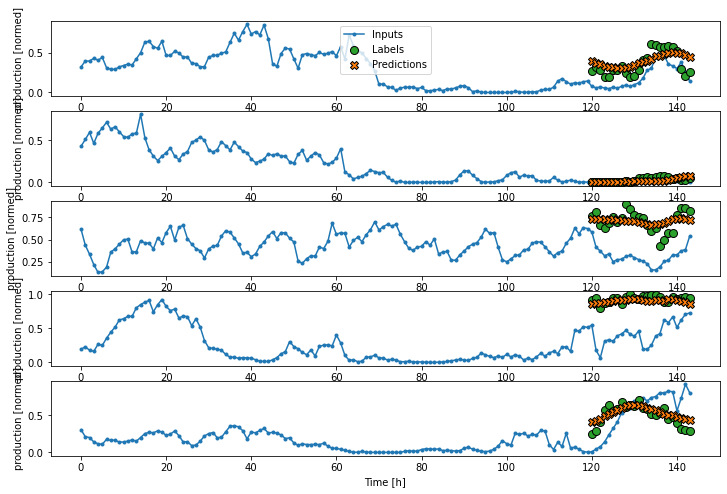

In [55]:
multi_window.plot(model, max_subplots=5)

In [147]:
pd.concat([
    pd.DataFrame(multi_performance).T, 
    pd.DataFrame(multi_val_performance).T], axis=1)

,0,1,0,1
MSE,3.288913e-02,0.362175,1.481043e-02,0.217444
MAE,1.381775e-01,0.358325,9.605145e-02,0.215280
MAPE,1.397444e+06,0.830530,1.188304e+06,0.805053
MSLE,1.472051e-02,0.366114,6.846995e-03,0.231390
CS,-9.478329e-01,5.314357,-9.656736e-01,4.526812
Huber,1.653948e-02,0.360170,7.755953e-03,0.221245
LogCosh,1.643650e-02,0.361389,7.777893e-03,0.221966


## Comparison

In [148]:
output = pd.concat([
    pd.DataFrame(multi_performance).T, 
    pd.DataFrame(multi_val_performance).T], axis=1)
output.columns = ["test_loss", "test_WMAPE", "valid_loss", "valid_WMAPE"]
# output.columns = ["test_loss", "test_MAE", "test_WMAPE", "valid_loss", "valid_MAE", "valid_WMAPE"]
output[["test_WMAPE", "valid_WMAPE"]].sort_values("test_WMAPE")

,test_WMAPE,valid_WMAPE
MAE,0.358325,0.215280
Huber,0.360170,0.221245
LogCosh,0.361389,0.221966
MSE,0.362175,0.217444
MSLE,0.366114,0.231390
MAPE,0.830530,0.805053
CS,5.314357,4.526812


In [149]:
# !pip install tabulate
print(output[["test_WMAPE", "valid_WMAPE"]].sort_values("test_WMAPE").to_markdown())

|         |   test_WMAPE |   valid_WMAPE |
|:--------|-------------:|--------------:|
| MAE     |     0.358325 |      0.21528  |
| Huber   |     0.36017  |      0.221245 |
| LogCosh |     0.361389 |      0.221966 |
| MSE     |     0.362175 |      0.217444 |
| MSLE    |     0.366114 |      0.23139  |
| MAPE    |     0.83053  |      0.805053 |
| CS      |     5.31436  |      4.52681  |


In [ ]:
def plot_metrics(sort_test=True):
    plt.figure(figsize=(12, 15))
    x = np.arange(len(multi_performance))
    width = 0.3
    
    for n in range(len(model.metrics_names)):
        plt.subplot(len(model.metrics_names), 1, n+1)
        metric_name = model.metrics_names[n]
        val_mae = [v[n] for v in multi_val_performance.values()]
        test_mae = [v[n] for v in multi_performance.values()]
        
        if sort_test:
            sorted_index = np.argsort(test_mae)
        else:
            sorted_index = np.argsort(val_mae)
        val_mae = [val_mae[i] for i in sorted_index]
        test_mae = [test_mae[i] for i in sorted_index]

        plt.bar(x - 0.17, val_mae, width, label='Validation')
        plt.bar(x + 0.17, test_mae, width, label='Test')
        plt.xticks(ticks=x, labels=[list(multi_performance.keys())[i] for i in sorted_index], rotation=45)
        plt.ylabel(metric_name)
        plt.title(metric_name)
        if n == 0:
            _ = plt.legend()

In [ ]:
plot_metrics()

# Run all

In [168]:
LOSS = "mae" # "mse", tf.losses.MeanSquaredError()
OPTIMIZER = tf.keras.optimizers.RMSprop(clipvalue=1.0)

In [169]:
def wmape(y_true, y_pred):
    total_abs_diff = tf.reduce_sum(tf.abs(tf.subtract(y_true, y_pred)))
    total = tf.reduce_sum(y_true)
    wmape = tf.realdiv(total_abs_diff, total)
    return wmape

MAX_EPOCHS = 100

def compile_and_fit(model, window, loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), patience=10):
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_wmape',
        patience=patience,
        mode='min', 
        verbose=0,
        restore_best_weights=True)
    
    model.compile(loss=loss, optimizer=optimizer, metrics=[wmape]) 
    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        validation_data=window.valid,
                        verbose=0,
                        callbacks=[early_stopping],
                       #  validation_steps=50
                       )
    return history

In [171]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(multi_window.input_width, multi_window.feature_number)))
model.add(layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros()))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(OUT_STEPS))
model.add(layers.Reshape([OUT_STEPS, 1]))

history = compile_and_fit(model, multi_window, loss="mse", optimizer="rmsprop")
multi_val_performance['MSE-ADAM'] = model.evaluate(multi_window.valid)
multi_performance['MSE-ADAM'] = model.evaluate(multi_window.test)

Epoch 1/100
328/328 [==============================] - 1s 3ms/step - loss: 0.0379 - wmape: 0.4671 - val_loss: 0.0366 - val_wmape: 0.3319
Epoch 2/100
328/328 [==============================] - 1s 3ms/step - loss: 0.0248 - wmape: 0.3781 - val_loss: 0.0196 - val_wmape: 0.2548
Epoch 3/100
328/328 [==============================] - 1s 3ms/step - loss: 0.0228 - wmape: 0.3615 - val_loss: 0.0282 - val_wmape: 0.2996
Epoch 4/100
328/328 [==============================] - 1s 3ms/step - loss: 0.0220 - wmape: 0.3561 - val_loss: 0.0330 - val_wmape: 0.3261
Epoch 5/100
328/328 [==============================] - 1s 3ms/step - loss: 0.0215 - wmape: 0.3515 - val_loss: 0.0163 - val_wmape: 0.2254
Epoch 6/100
328/328 [==============================] - 1s 4ms/step - loss: 0.0212 - wmape: 0.3494 - val_loss: 0.0172 - val_wmape: 0.2323
Epoch 7/100
328/328 [==============================] - 1s 3ms/step - loss: 0.0210 - wmape: 0.3478 - val_loss: 0.0167 - val_wmape: 0.2296
Epoch 8/100
328/328 [====================

KeyboardInterrupt: 

ModuleNotFoundError: No module named 'optuna'